In [1]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import scipy.stats as stats
import copy
import skimage.io as sk 
import noise #jean's final work


# Final Results

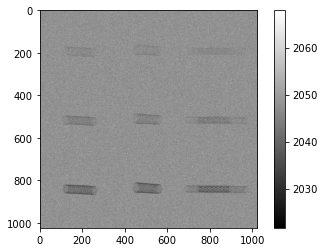

In [2]:
arrray_tif = noise.get_tif("data/tif/cdstent_.tif")
noised_arrray_tif = noise.noise_gaussin(arrray_tif)
plt.imshow(noised_arrray_tif, cmap='gray')
plt.colorbar()

# Draft Workspace 

In [5]:
im =  Image.open("data/tif/cdstent_.tif")
im = sk.imread("data/tif/cdstent_.tif", plugin="tifffile")*1.
im.dtype

dtype('float64')

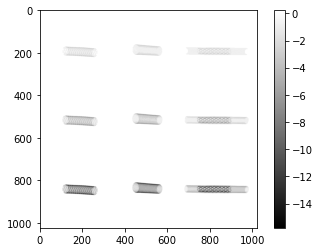

In [3]:
plt.imshow(im- np.mean(im), cmap='gray')
plt.colorbar()


dtype('float64')

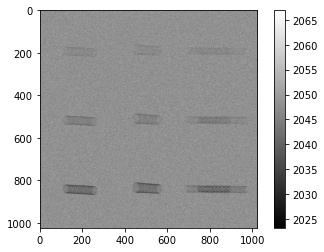

In [38]:
noised = im + np.random.normal(0,4,size= im.shape)
plt.imshow(noised, cmap='gray')
plt.colorbar()
noised.dtype

(array([1.80000e+01, 2.02000e+02, 1.97000e+03, 2.19210e+04, 1.61320e+05,
        4.21199e+05, 3.47254e+05, 8.80320e+04, 6.51700e+03, 1.43000e+02]),
 array([2020.91135974, 2025.53102632, 2030.15069289, 2034.77035947,
        2039.39002604, 2044.00969262, 2048.6293592 , 2053.24902577,
        2057.86869235, 2062.48835893, 2067.1080255 ]),
 <BarContainer object of 10 artists>)

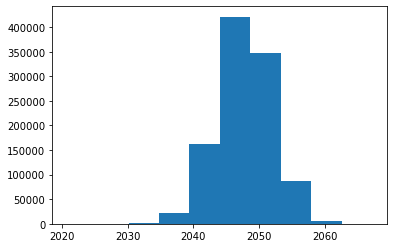

In [35]:
plt.hist(noised.reshape(1024**2))

In [2]:
# Convert TIF base to PNG
base_dir_path = "data/dataset/base_tif"
base_dir_files = os.listdir(base_dir_path)
base_dir_files.sort(reverse=True)

save_path = "data/dataset/base_png"

for file in base_dir_files:
    file_path = os.path.join(base_dir_path, file)
    base_img = Image.open(file_path)
    base_img.save(os.path.join(save_path, file[:-4] + '.png'))

In [49]:
base_img_size = (512, 512)
base_dir_path = "data/dataset/base_png"
base_dir_files = os.listdir(base_dir_path)
base_dir_files.sort(reverse=True)

init_base_imgs = True
base_imgs = []
for file in base_dir_files:
    file_path = os.path.join(base_dir_path, file)
    file_path = file_path.replace("\\","/")
    base_img = Image.open(file_path)    
    base_img = np.array(base_img)//256
    base_imgs.append(base_img)
    

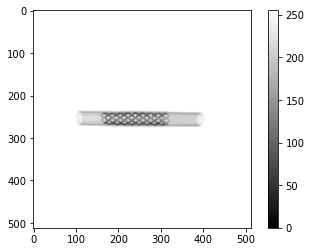

In [50]:
plt.imshow(base_imgs[0], cmap='gray')
plt.colorbar()

In [51]:
noised_raw_img = Image.open('data/tif/CDStent_noise4.tif')

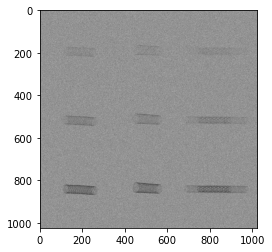

In [52]:
noised_raw_img_a = np.array(noised_raw_img)//256
plt.imshow(noised_raw_img_a,cmap='gray')


In [53]:
noise1 = 255- noised_raw_img_a[210:450,].reshape((245760))
noise2 = 255- noised_raw_img_a[580:800,].reshape((225280))
noise3 = 255- noised_raw_img_a[900:1000,].reshape((102400))



65536

In [55]:
print(np.mean(noise1),np.mean(noise2) ,np.mean(noise3))
print(np.std(noise1),np.std(noise2) ,np.std(noise3))

108.49816487630208 108.35118963068182 108.517734375
21.846426201513015 21.84126327871964 21.9040792867035


mean 108.49816487630208
std 21.846426201513015


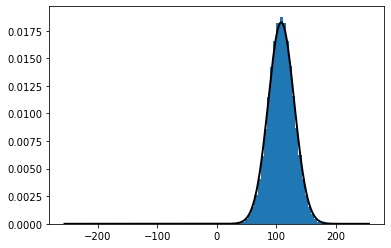

In [56]:
def plot_hist_normal_dist(y, bins = 30):
    mean = np.mean(y); std = np.std(y);
    print('mean', mean)
    print('std', std)
    x = np.linspace(-256,256,500)
    plt.plot(x, stats.norm.pdf(x, mean, std),'k', linewidth=2)
    plt.hist(y,bins, density=True)
plot_hist_normal_dist(noise1,bins= 38)



mean -107.8832618076526
std 22.047588752132945
mean -53.76634068019267
std 34.24037390425269


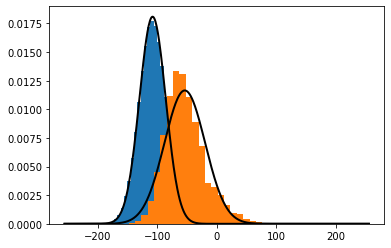

In [57]:
img = Image.open('data/tif/CDStent.tif')
img = np.array(img,dtype = 'int')//256
img = img.reshape(1048576)
#plt.imshow(img, cmap= 'gray')

noised = Image.open('data/tif/CDStent_noise4.tif')
noised = np.array(noised,dtype = 'int')//256
noised = noised.reshape(1048576)

line = img.reshape(1048576)

idx_stent = []
idx_blanc = []
for i in range(1048576):
    if line[i]<220:
        idx_stent.append(i)
    else:
        idx_blanc.append(i)


noise_blanc = noised[idx_blanc] - img[idx_blanc]
noise_stent = noised[idx_stent] - img[idx_stent]

plot_hist_normal_dist(noise_blanc,bins = 40)
plot_hist_normal_dist(noise_stent,bins = 24)

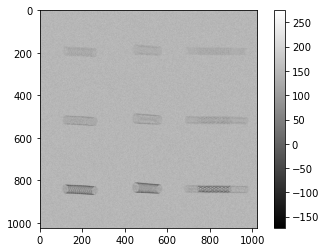

In [58]:
my_noised = np.zeros(1048576)
my_noised[idx_blanc] = img[idx_blanc] + np.random.normal(-108.43084678533491,21.836189610888702, len(idx_blanc) )
my_noised[idx_stent] = img[idx_stent] + np.random.normal(-74.42485783915515,34.98369209505041, len(idx_stent) )
my_noised= my_noised.reshape((1024,1024))

plt.imshow(my_noised, cmap = 'gray')
plt.colorbar()

In [62]:
import rawpy
import imageio

path = 'data/raw/CDStent.raw'
raw = rawpy.imread(path)
rgb = raw.postprocess()
imageio.imsave('default.tiff', rgb)

LibRawFileUnsupportedError: b'Unsupported file format or not RAW file'

In [63]:
im = Image.open(path)

UnidentifiedImageError: cannot identify image file 'data/raw/CDStent.raw'

## Brouillon

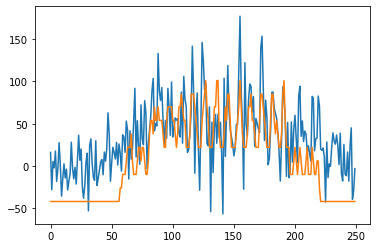

In [23]:
img = img.reshape((1024,1024))
plt.plot(255-my_noised[850,50:300]-107)
plt.plot(255-img[850,50:300]-42)


In [66]:
def noise_X_image(image, mean, std):
    line = image.reshape(512*512)
    noise = np.array(np.random.normal(mean,std,512*512), dtype='int')
    line = line -  noise
    #line = np.clip(line , 0,255)
    """
    x_min, x_max = line.min() , line.max()
    line = (line-x_min)*256/(x_max-x_min)"""
    line = line.reshape((512,512))
    return line #np.array(line, dtype='int')
def noise_X_image_bis(image, mean, std):
    line = image.reshape(512*512)
    idx = [i for i in range(0,512**2) if line[i]<200 ]
    print(len(idx),512**2)
    
    noise = np.array(np.random.normal(mean,std,512*512), dtype='int')
    line = line -  noise
    line[idx]=clip(line[idx])

    plt.hist(line)
    plt.show()

    line = line.reshape((512,512))
    return line #np.array(line, dtype='int')

6229 262144


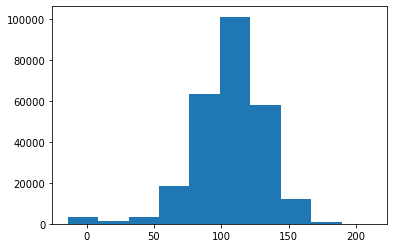

In [15]:
noised = noise_X_image_bis(base_imgs[0],mean, std )


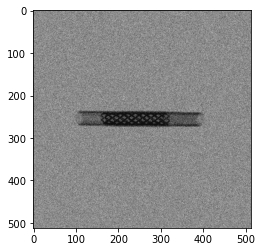

In [16]:
plt.imshow(noised,cmap='gray')

In [17]:
def set_between(x,inf=0,sup=256):
    x_min, x_max = x.min() , x.max()
    return inf + (x-x_min)*(sup-inf)/(x_max-x_min)
def clip(a,inf=0,sup=256):
    return np.clip(a, inf, sup)

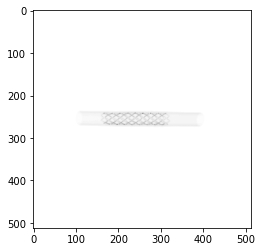

In [18]:
plt.imshow(set_between((base_imgs[0])**0.2),cmap='gray')

In [19]:
idx = [i for i in range(0,512**2) if line[i]<200 ]

NameError: name 'line' is not defined

In [20]:
noised_noise = noised[:220,].reshape((112640 ))

(array([1.70382805e-06, 0.00000000e+00, 3.40765611e-06, 6.81531221e-06,
        3.06689050e-05, 4.08918733e-05, 1.73790461e-04, 2.76020145e-04,
        5.16259900e-04, 1.16201073e-03, 1.82479985e-03, 2.74827465e-03,
        4.25616248e-03, 5.94295225e-03, 1.03490516e-02, 1.13440872e-02,
        1.32455593e-02, 1.56275109e-02, 1.66140273e-02, 2.08787090e-02,
        1.71439179e-02, 1.57007755e-02, 1.38555297e-02, 1.32762282e-02,
        8.62307378e-03, 6.31609059e-03, 4.45380653e-03, 3.09244792e-03,
        2.16215780e-03, 1.03422363e-03, 5.55447945e-04, 3.47580923e-04,
        1.78901946e-04, 8.34875746e-05, 2.55574208e-05, 1.70382805e-05,
        8.51914027e-06, 1.70382805e-06]),
 array([  7.        ,  12.21052632,  17.42105263,  22.63157895,
         27.84210526,  33.05263158,  38.26315789,  43.47368421,
         48.68421053,  53.89473684,  59.10526316,  64.31578947,
         69.52631579,  74.73684211,  79.94736842,  85.15789474,
         90.36842105,  95.57894737, 100.78947368, 106.

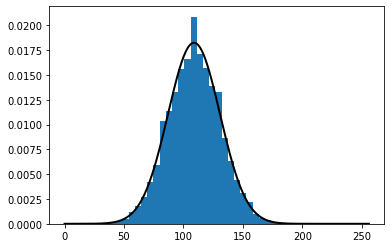

In [ ]:
mean_ = np.mean(noised_noise); std_ = np.std(noised_noise); variance_ = np.square(std_)
x = np.linspace(0,256,500)
plt.plot(x, stats.norm.pdf(x, mean_, std_),'k', linewidth=2)
plt.hist(noised_noise,bins=38, density=True)

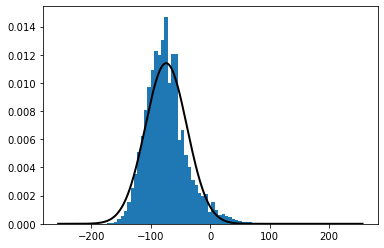

In [40]:
print(())

(-74.42485783915515, 34.98369209505041)
